In [39]:
# importing

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from collections import Counter

In [11]:
# data

iris = datasets.load_iris()
X = iris.data[:, :2] # using 2 features for simplicity
y = iris.target

X.shape

(150, 2)

In [12]:
y.shape

(150,)

In [13]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# the model

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

In [28]:
# evaluating

names = iris.target_names

knn_classification_report = classification_report(y_test, y_pred, target_names=names)
print(knn_classification_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.62      0.62      0.62        13
   virginica       0.62      0.62      0.62        13

    accuracy                           0.78        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



In [30]:
# Create a mesh grid for plotting the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [32]:
# Predict the class labels for the grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [33]:
# Create a colormap for the decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

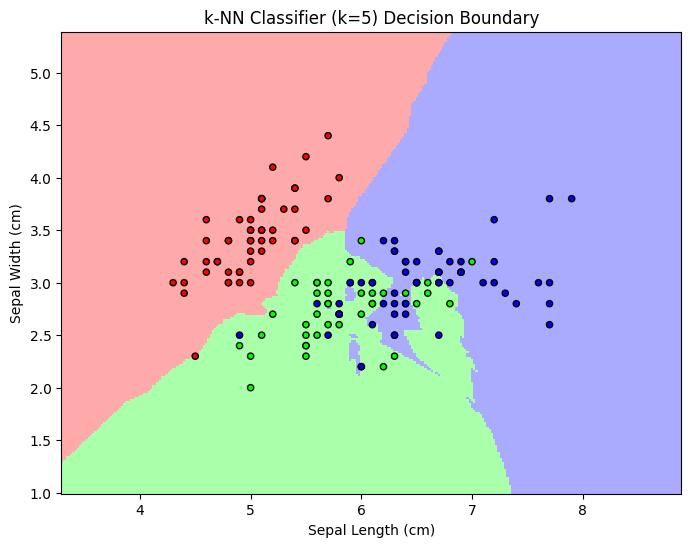

In [35]:
# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'k-NN Classifier (k={5}) Decision Boundary')
plt.show()

#### from scratch 

In [45]:
# setting the k

k = 2

In [46]:
# Sample data
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7]])
y = np.array([0, 0, 1, 1, 1])

In [47]:
# euclidean distance

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [48]:
# before the actual prediction

def individual_predict(x):
    # distance between x and all other data
    distances = [euclidean_distance(x, val) for val in X]

    # finding the k distances
    k_indices = np.argsort(distances)[:k]
    
    # extract the label from indices
    k_neaer_labels = [y[i] for i in k_indices]
    
    most_common = Counter(k_neaer_labels).most_common(1)
    return most_common[0][0]
    

In [49]:
# predicting

y_pred = [individual_predict(x) for x in X]
y_pred = np.array(y_pred)

In [50]:
y_pred

array([0, 0, 1, 1, 1])

In [51]:
y

array([0, 0, 1, 1, 1])